In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yapwh1208/cats-breed-dataset

!unzip -q cats-breed-dataset.zip -d cats_breed_dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/yapwh1208/cats-breed-dataset
License(s): CC-BY-NC-SA-4.0
 97% 524M/541M [00:01<00:00, 274MB/s]
100% 541M/541M [00:01<00:00, 367MB/s]


In [3]:
!ls cats_breed_dataset

cat_v1


In [4]:
import os
os.listdir("cats_breed_dataset/cat_v1")

['ragdoll', 'maine_coon', 'bengal', 'siamese', 'domestic_shorthair']

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [7]:
from sklearn.model_selection import train_test_split
data_dir = "cats_breed_dataset/cat_v1"
img_size = (128, 128)

X = []
y = []
classes = os.listdir(data_dir)  #breed names
classes.sort()  #ensures same order each time

for label, breed in enumerate(classes):
    folder = os.path.join(data_dir, breed)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(label)
        except Exception as e:
            print("Error with:", img_path, e)


X = np.array(X, dtype="float32")
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train=X_train/255.0
X_test=X_test/255.0

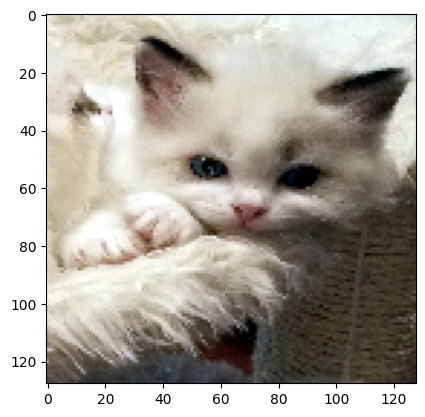

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[100])

In [10]:
y_train[:100]

array([2, 2, 4, 0, 3, 2, 3, 0, 2, 4, 2, 4, 3, 3, 1, 3, 1, 2, 3, 3, 2, 3,
       4, 3, 0, 4, 1, 1, 0, 4, 2, 2, 3, 3, 4, 2, 4, 3, 2, 0, 3, 4, 3, 3,
       2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 3, 3, 1, 4, 1, 4, 3, 4, 1, 3, 3, 1,
       0, 1, 3, 4, 1, 1, 2, 4, 3, 1, 0, 2, 2, 1, 4, 4, 2, 1, 2, 3, 3, 3,
       3, 0, 4, 2, 2, 4, 3, 2, 1, 2, 3, 1])

In [18]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(128,128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])
cnn = models.Sequential([
data_augmentation,
layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(128, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(256, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),

layers.Flatten(),
layers.Dense(256, activation='relu'),
layers.Dropout(0.5),
layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2211 - loss: 1.6273
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2666 - loss: 1.5877
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3399 - loss: 1.4870
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3577 - loss: 1.4272
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4332 - loss: 1.3826
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4309 - loss: 1.3592
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4338 - loss: 1.3087
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4551 - loss: 1.2750
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4696 - loss: 1.2775
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4866 - loss: 1.2887
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4802 - loss: 1.2297
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5050 - lo

In [20]:
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step


In [21]:
y_pred

array([[2.96570957e-02, 3.06070060e-03, 9.65266883e-01, 1.19719261e-04,
        1.89558393e-03],
       [1.79641210e-02, 5.32564856e-02, 7.76078030e-02, 2.51262724e-01,
        5.99908829e-01],
       [1.26364119e-02, 3.26986499e-02, 3.70335579e-02, 1.76990479e-01,
        7.40640819e-01],
       [1.83424074e-03, 2.45553665e-02, 2.04325411e-02, 7.82239676e-01,
        1.70938134e-01],
       [1.50660276e-01, 2.01382145e-01, 3.39415222e-02, 4.33500439e-01,
        1.80515528e-01],
       [1.06111184e-01, 2.18100205e-01, 6.57991529e-01, 3.53918341e-03,
        1.42578511e-02],
       [1.02830222e-02, 4.27850395e-01, 4.75183269e-03, 5.44145823e-01,
        1.29689956e-02],
       [3.08759250e-02, 7.10586784e-03, 1.70363132e-02, 1.11161046e-01,
        8.33820820e-01],
       [3.07778195e-02, 2.08157629e-01, 1.69384722e-02, 6.31198585e-02,
        6.81006253e-01],
       [2.94620451e-02, 7.70307854e-02, 4.18934822e-02, 1.38656512e-01,
        7.12957084e-01],
       [7.52328098e-01, 1.8564

In [22]:
y_pred_classes[:5]

array([2, 4, 4, 3, 3])

In [24]:
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.46073299646377563


In [28]:
from tensorflow.keras.applications import MobileNetV2 #using transfer learning to try to increase the accuracy
from tensorflow.keras import layers, models
model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(128,128,3))
model.trainable = False

cnn1=models.Sequential([
    data_augmentation,
    model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

cnn1.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [29]:
cnn1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 670ms/step - accuracy: 0.3716 - loss: 1.7741 - val_accuracy: 0.6597 - val_loss: 0.9026
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 589ms/step - accuracy: 0.6830 - loss: 0.8529 - val_accuracy: 0.7277 - val_loss: 0.7986
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 608ms/step - accuracy: 0.7756 - loss: 0.6531 - val_accuracy: 0.7277 - val_loss: 0.7606
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 637ms/step - accuracy: 0.7968 - loss: 0.5621 - val_accuracy: 0.7173 - val_loss: 0.7849
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 600ms/step - accuracy: 0.7977 - loss: 0.5523 - val_accuracy: 0.7330 - val_loss: 0.7266
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 590ms/step - accuracy: 0.8193 - loss: 0.5069 - val_accuracy: 0.6963 - val_loss: 0.7506
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 611ms/step - accuracy: 0.7886 - loss: 0.5244 - val_accuracy: 0.7382 - val_loss: 0.7418
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 769ms/step - accuracy: 0.8414 - loss: 0.4734 - val_accu

In [32]:
test_loss, test_acc = cnn1.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:",test_acc)

Test Accuracy: 0.753926694393158
